In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import joblib

In [5]:
# === Load Iris dataset ===
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [6]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
# === Column formatting (simulate formatting, e.g. clean column names) ===
df.columns = [col.strip().lower().replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_") for col in df.columns]
df

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
# === No need for NA fill or encoding as Iris data is clean numeric ===

In [9]:
# === Split data (70% train, 30% validation) ===
X = df.drop('target', axis=1)
y = df['target']

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.7, random_state=42, stratify=y)

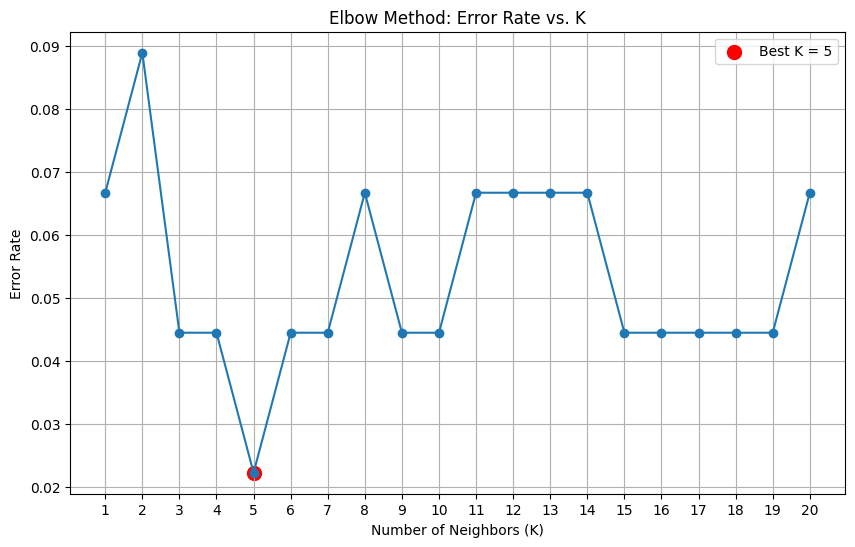

Best K (lowest error rate): 5


In [11]:
import matplotlib.pyplot as plt

# === KNN training + validation ===
error_rates = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    error = 1 - accuracy_score(y_val, y_pred)
    error_rates.append(error)

# === Elbow plot ===
plt.figure(figsize=(10, 6))
plt.plot(k_values, error_rates, marker='o', linestyle='-')
plt.title('Elbow Method: Error Rate vs. K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Error Rate')
plt.xticks(k_values)
plt.grid(True)

# Highlight the "elbow" point (best K)
best_k = k_values[error_rates.index(min(error_rates))]
plt.scatter(best_k, min(error_rates), color='red', s=100, label=f'Best K = {best_k}')
plt.legend()

plt.show()

print(f"Best K (lowest error rate): {best_k}")

In [13]:
# === KNN inferencing ===
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)

In [14]:
scoring = accuracy_score(y_val, y_pred)
print(scoring)

0.9777777777777777


In [15]:
# === Save the best model ===
best_k = k_values[error_rates.index(min(error_rates))]
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

joblib.dump(best_knn, "best_knn_iris_model.joblib")
print(f"Best K: {best_k}. Model saved as 'best_knn_iris_model.joblib'.")

Best K: 5. Model saved as 'best_knn_iris_model.joblib'.
